**경사하강법 - 모델이 데이터를 잘 표현할 수 있도록 기울기를 사용하여 모델을 조금씩 조정하는 알고리즘**

**y-hat = wx + b**



**1.   무작위로 w와 b를 정합니다(무작위로 모델 만들기)**

**2.   x에서 샘플 하나를 선택하여 y-hat을 계산합니다(무작위로 모델 예측하기)**

**3.   y-hat과 선택한 샘플의 진짜 y를 비교합니다(예측한 값과 진짜 정답 비교하기)**

**4.   y-hat이 y와 더 가까워지도록 w, b를 조정합니다(모델 조정하기)**

**5.   모든 샘플을 처리할때까지 2~4를 반복합니다.**









**훈련 데이터의 첫 샘플 데이터로 y-hat 얻기**

In [7]:
import numpy as np
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
diabetes = load_diabetes()
x = diabetes.data[:, 2]
y = diabetes.target
w = 1.0
b = 1.0
y_hat = x[0] * w + b
print(y_hat)
print(y[0])

1.0616962065186886
151.0


**w값 조절해 예측값 바꾸기 (w += 0.1)**

In [2]:
import numpy as np
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
diabetes = load_diabetes()
x = diabetes.data[:, 2]
y = diabetes.target
w = 1.0
b = 1.0
y_hat = x[0] * w + b

w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
print(y_hat_inc)

1.0678658271705574


**w 값 조정 후 예측값 증가도 확인**

In [4]:
import numpy as np
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
diabetes = load_diabetes()
x = diabetes.data[:, 2]
y = diabetes.target
w = 1.0
b = 1.0
y_hat = x[0] * w + b
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b

w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)

0.061696206518688734


**w 가중치 업데이트**

In [5]:
import numpy as np
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
diabetes = load_diabetes()
x = diabetes.data[:, 2]
y = diabetes.target
w = 1.0
b = 1.0
y_hat = x[0] * w + b
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
w_rate = (y_hat_inc - y_hat) / (w_inc - w)

w_new = w + w_rate
print(w_new)

1.0616962065186888


**b 업데이트**

In [6]:
import numpy as np
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
diabetes = load_diabetes()
x = diabetes.data[:, 2]
y = diabetes.target
w = 1.0
b = 1.0
y_hat = x[0] * w + b
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
w_new = w + w_rate

b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print(y_hat_inc)
b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

1.1616962065186887
1.0


In [7]:
import numpy as np
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
diabetes = load_diabetes()
x = diabetes.data[:, 2]
y = diabetes.target
w = 1.0
b = 1.0
y_hat = x[0] * w + b
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
w_new = w + w_rate
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
b_rate = (y_hat_inc - y_hat) / (b_inc - b)

b_new = b + 1
print(b_new)

2.0


**오차 역전파(backpropagation)를 이용하여 가중치 업데이트하기**




In [8]:
import numpy as np
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
diabetes = load_diabetes()
x = diabetes.data[:, 2]
y = diabetes.target
w = 1.0
b = 1.0
y_hat = x[0] * w + b

err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + 1 * err
print(w_new, b_new)

10.250624555904514 150.9383037934813


In [9]:
import numpy as np
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
diabetes = load_diabetes()
x = diabetes.data[:, 2]
y = diabetes.target
w = 1.0
b = 1.0
y_hat = x[0] * w + b
err = y[0] - y_hat
w_new = w + w_rate * err

y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

14.132317616381767 75.52764127612664


**전체 샘플 반복하기**

In [10]:
import numpy as np
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
diabetes = load_diabetes()
x = diabetes.data[:, 2]
y = diabetes.target
w = 1.0
b = 1.0
y_hat = x[0] * w + b

for x_i, y_i in zip(x, y):
  y_hat = x_i * w + b
  err = y_i - y_hat
  w_rate = x_i
  w = w + w_rate * err
  b = b + 1 * err
print(w, b)

587.8654539985689 99.40935564531424


**그래프 그려보기**

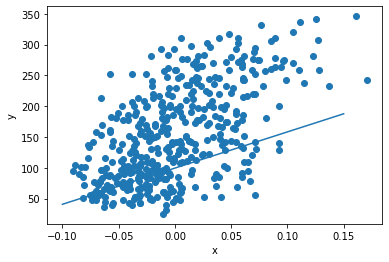

In [11]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
plt.scatter(x,y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]],[pt1[1],pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**에포크 100번 반복하기**

In [13]:
import numpy as np
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
diabetes = load_diabetes()
x = diabetes.data[:, 2]
y = diabetes.target
w = 1.0
b = 1.0
y_hat = x[0] * w + b

for i in range(1,100):
  for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
print(w, b)

913.5973364345905 123.39414383177204


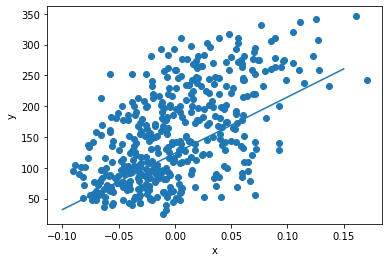

In [14]:
import numpy as np
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
diabetes = load_diabetes()
x = diabetes.data[:, 2]
y = diabetes.target
w = 1.0
b = 1.0
y_hat = x[0] * w + b
for i in range(1,100):
  for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err

plt.scatter(x,y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]],[pt1[1],pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**모델로 예측해보기 (x가 0.18일 때)**

287.8416643899983


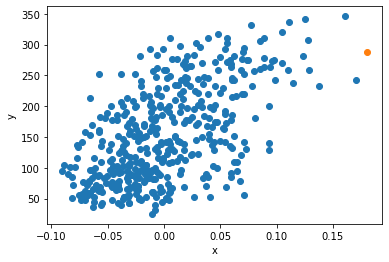

In [15]:
import numpy as np
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
diabetes = load_diabetes()
x = diabetes.data[:, 2]
y = diabetes.target
w = 1.0
b = 1.0
y_hat = x[0] * w + b
for i in range(1,100):
  for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err

x_new = 0.18
y_pred = x_new * w + b
print(y_pred)
plt.scatter(x,y)
plt.scatter(x_new, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()